In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lightkurve as lk

In [40]:
name ='TIC 260353074'
sr = lk.search_lightcurve(name, author='SPOC')

In [41]:
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 02,2018,SPOC,120,260353074,0.0
1,TESS Sector 03,2018,SPOC,120,260353074,0.0
2,TESS Sector 04,2018,SPOC,120,260353074,0.0
3,TESS Sector 05,2018,SPOC,120,260353074,0.0
4,TESS Sector 06,2018,SPOC,120,260353074,0.0
5,TESS Sector 07,2019,SPOC,120,260353074,0.0
6,TESS Sector 08,2019,SPOC,120,260353074,0.0
7,TESS Sector 09,2019,SPOC,120,260353074,0.0
8,TESS Sector 10,2019,SPOC,120,260353074,0.0


In [42]:
lcfs = sr.download_all()

In [43]:
# Use the normalized PDCSAP_FLUX
lc = lcfs[0].normalize()
# Loop through the rest of the LCFS, appending to the first light curve
for lcf in lcfs[1:]:
    lc = lc.append(lcf.normalize())

In [44]:
q0 = lc.quality == 0
lc = lc[q0].remove_nans()

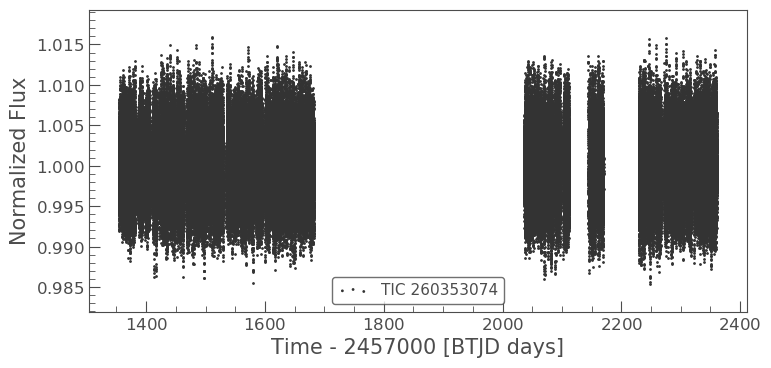

In [45]:
lc.scatter()

In [46]:
times = lc.time
flux = lc.flux - np.mean(lc1.flux) + 1
mags = -2.5 * np.log10(flux)
mags = mags - np.mean(mags)

x_TIC = times
y_TIC = mags

In [47]:
sort_idx = np.argsort(x_TIC)

In [48]:
n=25

In [ ]:
segment_size = [0]+sorted(np.argsort(np.diff(x_TIC[sort_idx]))[::-1][:25])
segment_borders = [0]+[i+1 for i in sorted(np.argsort(np.diff(x_TIC[sort_idx]))[::-1][:n])]+[len(x_TIC)]

In [ ]:
iterr = 0
#sort_idx = np.argsort(t_combRT)
for i in range(0,n):
    print(iterr)
    plt.scatter(x_TIC[sort_idx][segment_borders[i]:segment_borders[i+1]], y_TIC[sort_idx][segment_borders[i]:segment_borders[i+1]], s=1)
    iterr += 1

In [ ]:
#AS
#freq, amp = AS(t_TESS, highpass(m_TESS, 5, 50)[5], 15)
freq, amp = AS(x_TIC, y_TIC, 15)
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(freq, amp)
freq=freq[1000:]
amp=amp[1000:]
ax.plot(freq, amp)
max_power = amp.max()
peaks, _ = find_peaks(amp, height=max_power*0.4, distance=200)
ax.plot(freq[peaks], amp[peaks], "x")
sort_idx = np.argsort(amp[peaks])[::-1]
f_TESS = freq[peaks][sort_idx]
a_TESS = amp[peaks][sort_idx]
print(f_TESS)
print(a_TESS)
print(len(f_TESS))

In [ ]:
f_TESS_list = [11.99158946, 14.63919138, 20.87840057, 13.00383616]
a_TESS_list = [0.00246508, 0.00197533, 0.00191925, 0.00184786]

f_TESS_list = [11.99158946, 14.63919138, 20.87840057, 13.00383616, 12.49446322, 14.01831695,
 11.487294  ]
a_TESS_list = [0.00246508, 0.00197533, 0.00191925, 0.00184786, 0.00144314, 0.00106235,
 0.00103356]


sort_idx = np.argsort(x_TIC)
segment_borders = [0]+[i+1 for i in sorted(np.argsort(np.diff(x_TIC[sort_idx]))[::-1][:24])]+[len(x_TIC)]

times = x_TIC
magnitudes = y_TIC

time_slice, mag_slice, phase, phase_err = [], [], [], []
time_delays, time_delays_err, time_midpoints = [], [], []

iteration = 0

# Iterate over lightcurve
for t, y, idx in zip(times, magnitudes, range(len(times))):
    time_slice.append(t)
    mag_slice.append(y)

    # In each segment
    if idx == segment_borders[iteration+1]-1:
        print(iteration)
        print(idx)
        
        fig1, ax1 = plt.subplots(1, 1, figsize=(6.5, 3.5*2.5/2))
        ax1.scatter(time_slice, mag_slice)
        ax1.axvline(min(time_slice))
        ax1.axvline(max(time_slice))
        
        print('Calc AS')
        #AS################
        freq, amp = AS(time_slice, mag_slice, 5)

        fig, ax = plt.subplots(1, 1, figsize=(7, 4))
        ax.plot(freq, amp)

        freq=freq[50:]
        amp=amp[50:]
        ax.plot(freq, amp)

        max_power = amp.max()

        peaks, _ = find_peaks(amp, height=max_power*0.5, distance=50)
        ax.plot(freq[peaks], amp[peaks], "x")


        sort_idx = np.argsort(amp[peaks])[::-1]
        f_TESS = freq[peaks][sort_idx]
        a_TESS = amp[peaks][sort_idx]

        print(f_TESS)
        print(a_TESS)
        print(len(f_TESS))
        #####################
        
        # Append the time midpoint
        time_midpoints.append(np.mean(time_slice))

        # And the phases for each frequency
        
        print('Calc LS fit')
        sol = phases_simon(time_slice, mag_slice, f_TESS_list, a_TESS_list, [0.5]*len(f_TESS_list))
        
        print(sol)
        
        phase_i = sol[2]*2*np.pi
        phase.append(dft_phase(time_slice, mag_slice, f_TESS_list))
        #phase.append(phase_i)
        phase_err_i = sol[3]*2*np.pi
        phase_err.append(phase_err_i)
        
        time_slice, mag_slice = [], []
        
        iteration += 1 

phase = np.array(phase).T
print(phase)
phase = np.unwrap(phase)
phase -= np.mean(phase)
print(phase)

phase_err = np.array(phase_err).T

print('Calc TD')
# Phase wrapping patch
for ph, ph_err, f in zip(phase, phase_err, f_TESS_list):
    td = ph / (2*np.pi*f)
    time_delays.append(td-np.mean(td))
    time_delays_err.append(ph_err / (2*np.pi*f))

print('Plot TD')
fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5*2.5/2))
for i in range(len(f_TESS_list)):
    #ax[0].scatter(time_midpoints, time_delays[i]*86400, s=5)
    ax.errorbar(time_midpoints, (time_delays[i]-time_delays[i][-1])*86400, yerr = time_delays_err[i]*86400, fmt='.')    
    #ax[0].set_ylim(-800, 800)
    #ax[1].set_ylim(-800, 800)
    
#plt.tight_layout()
#fig.savefig('f_TESS1.png', tight_layout=True)


t_td_AT = time_midpoints
tau_td_AT = []
for j in range(len(f_TESS_list)):
    tau_td_AT.append(np.array([i*86400 for i in time_delays][j]-[i*86400 for i in time_delays][j][-1]))
tau_err_td_AT = time_delays_err